<h2 style="color:blue" align="center">Handwritten digits classification using neural network</h2>

Let us classify handwritten digits using 
1. A simple NN which has only input and output layers. 
2. NN with one hidden layer.
3. NN with two hidden layers.

and see how the performance of the model improves

<img src="Figures/MNIST-Handwritten digits.png" height=450 width=450/>

#### TensorFlow Installation

In [1]:
#!pip install tensorflow

In [2]:
import tensorflow as tf

In [3]:
print(tf.version.VERSION)

2.9.1


#### Import the necessary libraries

In [4]:
import tensorflow as tf 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras import backend as K
from keras.callbacks import ModelCheckpoint

In [5]:
K.backend()

'tensorflow'

#### Load and split MNIST for training and testing

In [6]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

#### Explore the dataset

Keras Handwritten digit MNIST dataset

<img src="Figures/dataset.png" height=450 width=450 />

In [7]:
len(X_train)

60000

In [8]:
len(X_test)

10000

In [9]:
X_train[0].shape

(28, 28)

It would be something like this

<img src='Figures/pixel.png' />

In [10]:
X_train[0]
# Displays 28 x 28 pixels in 2D array

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

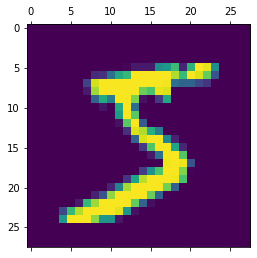

In [11]:
plt.matshow(X_train[0])

In [12]:
y_train[0]
# Label for the above input image

5

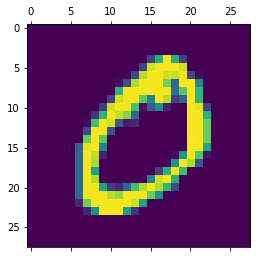

In [13]:
plt.matshow(X_train[1])

In [14]:
y_train[1]

0

In [15]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

#### Flattening

In [16]:
X_train.shape

(60000, 28, 28)

In [17]:
X_train.shape[1]

28

You must convert this into 6000, 784

In [18]:
X_train_flattened = X_train.reshape(len(X_train), 28 * 28)
X_train_flattened

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [19]:
X_train_flattened.shape

(60000, 784)

In [20]:
X_train_flattened[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [21]:
X_test_flattened = X_test.reshape(len(X_test),  28 * 28)
X_test_flattened

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

#### Normalize the input dataset

In [22]:
X_train_normalized = X_train_flattened / 255

In [23]:
X_train_normalized[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [24]:
X_test_normalized = X_test_flattened / 255

### NN model with one hidden layer

<img src="Figures/model2.png" height=400 width=400 />

###### Model configuration

In [25]:
model = keras.Sequential([
    # input layer 784 neurons to first hidden layer with 64 neurons
    keras.layers.Dense(64, input_shape = (784,), activation='relu'), 
    # Previous hidden layer to output layer
    keras.layers.Dense(10, activation='sigmoid')    
])

##### Model summary

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


Layer details

In [27]:
model.layers

In [28]:
len(model.layers)

2

In [29]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

###### Training the model

In [30]:
model.fit(X_train_normalized, y_train, epochs = 100, verbose=1, batch_size=60000)

Epoch 1/100
1/1 [==============================] - 1s 866ms/step - loss: 2.4320 - accuracy: 0.0824
Epoch 2/100
1/1 [==============================] - 0s 148ms/step - loss: 2.3138 - accuracy: 0.1373
Epoch 3/100
1/1 [==============================] - 0s 155ms/step - loss: 2.2137 - accuracy: 0.2004
Epoch 4/100
1/1 [==============================] - 0s 145ms/step - loss: 2.1252 - accuracy: 0.2663
Epoch 5/100
1/1 [==============================] - 0s 145ms/step - loss: 2.0433 - accuracy: 0.3419
Epoch 6/100
1/1 [==============================] - 0s 146ms/step - loss: 1.9646 - accuracy: 0.4182
Epoch 7/100
1/1 [==============================] - 0s 175ms/step - loss: 1.8867 - accuracy: 0.4832
Epoch 8/100
1/1 [==============================] - 0s 160ms/step - loss: 1.8086 - accuracy: 0.5340
Epoch 9/100
1/1 [==============================] - 0s 169ms/step - loss: 1.7301 - accuracy: 0.5746
Epoch 10/100
1/1 [==============================] - 0s 168ms/step - loss: 1.6518 - accuracy: 0.6075
Epoch 11/

1/1 [==============================] - 0s 147ms/step - loss: 0.3418 - accuracy: 0.9077
Epoch 84/100
1/1 [==============================] - 0s 143ms/step - loss: 0.3397 - accuracy: 0.9083
Epoch 85/100
1/1 [==============================] - 0s 145ms/step - loss: 0.3377 - accuracy: 0.9088
Epoch 86/100
1/1 [==============================] - 0s 170ms/step - loss: 0.3358 - accuracy: 0.9094
Epoch 87/100
1/1 [==============================] - 0s 167ms/step - loss: 0.3338 - accuracy: 0.9099
Epoch 88/100
1/1 [==============================] - 0s 160ms/step - loss: 0.3320 - accuracy: 0.9102
Epoch 89/100
1/1 [==============================] - 0s 157ms/step - loss: 0.3301 - accuracy: 0.9107
Epoch 90/100
1/1 [==============================] - 0s 144ms/step - loss: 0.3283 - accuracy: 0.9110
Epoch 91/100
1/1 [==============================] - 0s 153ms/step - loss: 0.3265 - accuracy: 0.9115
Epoch 92/100
1/1 [==============================] - 0s 145ms/step - loss: 0.3248 - accuracy: 0.9120
Epoch 93/100


##### Printing the weights

Getting weights and bias values after the training stage

In [31]:
original_weights = model.get_weights()
# convert list to array
weights = np.array(original_weights)
weights

<ipython-input-31-4f8fb3d8cc7f>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  weights = np.array(original_weights)


array([array([[-0.04813967,  0.05688012,  0.07887251, ...,  0.02308235,
               -0.01049837, -0.05553117],
              [-0.07995151, -0.05474935,  0.05299487, ..., -0.0730487 ,
                0.05406619, -0.03304389],
              [ 0.01726405, -0.06676856,  0.01225473, ..., -0.07469594,
                0.00755899,  0.05167147],
              ...,
              [-0.01866877,  0.02681879,  0.03275628, ...,  0.00107562,
                0.06334836,  0.00610168],
              [ 0.07875999,  0.02691521, -0.01124977, ...,  0.0481484 ,
                0.00967352,  0.06937478],
              [-0.011832  , -0.05928593,  0.01030388, ...,  0.04899425,
                0.04837475,  0.05822787]], dtype=float32)              ,
       array([ 0.01419391,  0.06315757,  0.00287009,  0.01767485,  0.04598305,
               0.03015651,  0.02295499, -0.01494372,  0.01298721, -0.01319309,
               0.02572629,  0.03187933,  0.03026619,  0.07589135,  0.01151842,
               0.00843524, -0

In [32]:
weights.shape

(4,)

In [33]:
# weights of first layer
weights[0].shape

(784, 64)

In [34]:
# bias of first layer
weights[1].shape

(64,)

In [35]:
# weights of second layer
weights[2].shape

(64, 10)

In [36]:
# bias of second layer
weights[3].shape

(10,)

In [37]:
weights[0] 

array([[-0.04813967,  0.05688012,  0.07887251, ...,  0.02308235,
        -0.01049837, -0.05553117],
       [-0.07995151, -0.05474935,  0.05299487, ..., -0.0730487 ,
         0.05406619, -0.03304389],
       [ 0.01726405, -0.06676856,  0.01225473, ..., -0.07469594,
         0.00755899,  0.05167147],
       ...,
       [-0.01866877,  0.02681879,  0.03275628, ...,  0.00107562,
         0.06334836,  0.00610168],
       [ 0.07875999,  0.02691521, -0.01124977, ...,  0.0481484 ,
         0.00967352,  0.06937478],
       [-0.011832  , -0.05928593,  0.01030388, ...,  0.04899425,
         0.04837475,  0.05822787]], dtype=float32)

In [38]:
model.layers[0].get_weights()
# displays the weights and biases of first layer

[array([[-0.04813967,  0.05688012,  0.07887251, ...,  0.02308235,
         -0.01049837, -0.05553117],
        [-0.07995151, -0.05474935,  0.05299487, ..., -0.0730487 ,
          0.05406619, -0.03304389],
        [ 0.01726405, -0.06676856,  0.01225473, ..., -0.07469594,
          0.00755899,  0.05167147],
        ...,
        [-0.01866877,  0.02681879,  0.03275628, ...,  0.00107562,
          0.06334836,  0.00610168],
        [ 0.07875999,  0.02691521, -0.01124977, ...,  0.0481484 ,
          0.00967352,  0.06937478],
        [-0.011832  , -0.05928593,  0.01030388, ...,  0.04899425,
          0.04837475,  0.05822787]], dtype=float32),
 array([ 0.01419391,  0.06315757,  0.00287009,  0.01767485,  0.04598305,
         0.03015651,  0.02295499, -0.01494372,  0.01298721, -0.01319309,
         0.02572629,  0.03187933,  0.03026619,  0.07589135,  0.01151842,
         0.00843524, -0.02595096, -0.00743163,  0.04115118,  0.04263857,
         0.03591551,  0.009211  ,  0.01532376,  0.02491893,  0.019

In [39]:
model.layers[0].get_weights()[0]
# Displays the weights of first layer

array([[-0.04813967,  0.05688012,  0.07887251, ...,  0.02308235,
        -0.01049837, -0.05553117],
       [-0.07995151, -0.05474935,  0.05299487, ..., -0.0730487 ,
         0.05406619, -0.03304389],
       [ 0.01726405, -0.06676856,  0.01225473, ..., -0.07469594,
         0.00755899,  0.05167147],
       ...,
       [-0.01866877,  0.02681879,  0.03275628, ...,  0.00107562,
         0.06334836,  0.00610168],
       [ 0.07875999,  0.02691521, -0.01124977, ...,  0.0481484 ,
         0.00967352,  0.06937478],
       [-0.011832  , -0.05928593,  0.01030388, ...,  0.04899425,
         0.04837475,  0.05822787]], dtype=float32)

In [40]:
model.layers[0].get_weights()[1]
# Displays the biases of first layer

array([ 0.01419391,  0.06315757,  0.00287009,  0.01767485,  0.04598305,
        0.03015651,  0.02295499, -0.01494372,  0.01298721, -0.01319309,
        0.02572629,  0.03187933,  0.03026619,  0.07589135,  0.01151842,
        0.00843524, -0.02595096, -0.00743163,  0.04115118,  0.04263857,
        0.03591551,  0.009211  ,  0.01532376,  0.02491893,  0.01973728,
        0.0269187 , -0.01153365,  0.02295479,  0.03426042,  0.05521131,
        0.02233684,  0.01283569,  0.05823457, -0.01360542,  0.03110255,
        0.02406182,  0.02715356,  0.03605906,  0.02125433,  0.02759956,
        0.02724804, -0.02263388,  0.0532189 ,  0.05203376,  0.03155247,
       -0.0147003 ,  0.05983215, -0.038645  ,  0.02332723,  0.01011928,
        0.0373048 ,  0.00288769,  0.04639389, -0.00235184,  0.04252044,
        0.03867805,  0.06091679,  0.0427133 , -0.01606375,  0.04099516,
       -0.02271881,  0.02968079,  0.05303827,  0.01515708], dtype=float32)

In [41]:
model.layers[1].get_weights()
# displays the weights and biases of second layer

[array([[ 1.48192734e-01, -1.43987402e-01, -2.15735823e-01,
         -1.51497036e-01,  3.23052496e-01, -3.07974547e-01,
          1.19311877e-01, -3.02707285e-01, -6.56562671e-02,
          1.76180989e-01],
        [-1.23724207e-01, -1.07432336e-01,  1.82322115e-01,
         -2.67822564e-01, -2.66817510e-01,  1.92510009e-01,
          3.05676877e-01,  4.57922518e-02, -2.98948407e-01,
         -3.36647093e-01],
        [ 9.05203894e-02, -1.55540779e-01, -2.39642099e-01,
          1.21827029e-01, -2.45571569e-01,  1.15242831e-01,
          3.16537559e-01, -7.45181739e-02, -1.88032370e-02,
         -2.57266134e-01],
        [-6.25277087e-02,  2.11269692e-01,  8.32031667e-03,
         -1.01901077e-01,  2.75014430e-01,  2.86148995e-01,
         -1.20953567e-01, -2.90288031e-01, -2.96641346e-02,
         -2.25450218e-01],
        [-7.68280253e-02,  2.02011541e-01, -2.16230586e-01,
         -3.12701076e-01, -2.29462907e-01, -5.04134782e-02,
          2.26957217e-01,  2.52926141e-01,  1.008092

##### Storing and retrieving the weights

##### Storing and retrieving the models

##### HM model

In [56]:
def get_model(): 
    model_hm = keras.Sequential([
        # input layer 784 neurons to first hidden layer with 64 neurons
        keras.layers.Dense(64, input_shape = (784,), activation='relu'), 
        # first hidden layer with 64 neurons
        #keras.layers.Dense(64, activation='relu'), 
        # second hidden layer with 64 neurons
        #keras.layers.Dense(64, activation='relu'), 
        # Output layer with 10 neurons
        keras.layers.Dense(10, activation='sigmoid')
    ])
    model_hm.compile(
        optimizer = 'adam',
        loss = 'sparse_categorical_crossentropy',
        metrics = ['accuracy']
    )
    return model_hm

In [57]:
class CustomCallback(keras.callbacks.Callback): 
    iteration = 0
    initial_weights = 0
    previous_weights = 0
    call = 0
    
    def on_train_begin(self, logs=None):
        self.initial_weights = model_hm.get_weights() 
        self.initial_weights = np.array(self.initial_weights,dtype=object)
        self.previous_weights = self.initial_weights 
        self.call = np.vectorize(self.apply_gm) 
    
    def on_train_batch_end(self, epoch, logs=None): 
        counter = 0
        num_layers = len(model_hm.layers)  
        current_weights = model_hm.get_weights()
        current_weights = np.array(current_weights,dtype=object)        
        
        for i in range(num_layers):  
            current_weights[counter] = self.call(self.previous_weights[counter], current_weights[counter])
            counter = counter + 2
            
        updated = current_weights.tolist()   
        model_hm.set_weights(updated)
        self.previous_weights = current_weights
        self.iteration = self.iteration + 1  
        
    def apply_gm(self, v1,v2):     
        if v1==0 or v2==0:
            return v2
        elif v1>0 and v2>0:
            hm = 2*v1*v2/(v1+v2)
            min1 = min(v1,v2)
            diff = abs(hm-min1)
            if v2 > v1:
                return v2 + diff
            else:
                return v2 - diff
        elif v1<0 and v2<0:
            hm = 2*v1*v2/(v1+v2)
            max1 = max(v1,v2)
            diff = abs(hm-max1)
            if v2 > v1:
                return v2 + diff
            else:
                return v2 - diff
        else:
            return v2    

<h3 style="color:blue" align="center">HM adam vs simple adam for GD (full batch)</h3>

In [60]:
model_hm = get_model()
model_hm.fit(X_train_normalized, y_train, epochs = 500, verbose=1, callbacks=[CustomCallback()], batch_size=60000) 

Epoch 1/500
1/1 [==============================] - 1s 658ms/step - loss: 2.4442 - accuracy: 0.0993
Epoch 2/500
1/1 [==============================] - 0s 183ms/step - loss: 2.2830 - accuracy: 0.1280
Epoch 3/500
1/1 [==============================] - 0s 188ms/step - loss: 2.1571 - accuracy: 0.2499
Epoch 4/500
1/1 [==============================] - 0s 173ms/step - loss: 2.0455 - accuracy: 0.3750
Epoch 5/500
1/1 [==============================] - 0s 176ms/step - loss: 1.9384 - accuracy: 0.4687
Epoch 6/500
1/1 [==============================] - 0s 188ms/step - loss: 1.8319 - accuracy: 0.5376
Epoch 7/500
1/1 [==============================] - 0s 178ms/step - loss: 1.7256 - accuracy: 0.5895
Epoch 8/500
1/1 [==============================] - 0s 194ms/step - loss: 1.6208 - accuracy: 0.6330
Epoch 9/500
1/1 [==============================] - 0s 186ms/step - loss: 1.5185 - accuracy: 0.6687
Epoch 10/500
1/1 [==============================] - 0s 188ms/step - loss: 1.4194 - accuracy: 0.6964
Epoch 11/

1/1 [==============================] - 0s 207ms/step - loss: 0.2937 - accuracy: 0.9186
Epoch 84/500
1/1 [==============================] - 0s 209ms/step - loss: 0.2921 - accuracy: 0.9189
Epoch 85/500
1/1 [==============================] - 0s 203ms/step - loss: 0.2905 - accuracy: 0.9195
Epoch 86/500
1/1 [==============================] - 0s 220ms/step - loss: 0.2889 - accuracy: 0.9200
Epoch 87/500
1/1 [==============================] - 0s 184ms/step - loss: 0.2874 - accuracy: 0.9203
Epoch 88/500
1/1 [==============================] - 0s 180ms/step - loss: 0.2858 - accuracy: 0.9208
Epoch 89/500
1/1 [==============================] - 0s 191ms/step - loss: 0.2843 - accuracy: 0.9213
Epoch 90/500
1/1 [==============================] - 0s 233ms/step - loss: 0.2828 - accuracy: 0.9218
Epoch 91/500
1/1 [==============================] - 0s 163ms/step - loss: 0.2813 - accuracy: 0.9222
Epoch 92/500
1/1 [==============================] - 0s 162ms/step - loss: 0.2799 - accuracy: 0.9228
Epoch 93/500


1/1 [==============================] - 0s 184ms/step - loss: 0.1556 - accuracy: 0.9568
Epoch 246/500
1/1 [==============================] - 0s 175ms/step - loss: 0.1552 - accuracy: 0.9568
Epoch 247/500
1/1 [==============================] - 0s 185ms/step - loss: 0.1547 - accuracy: 0.9569
Epoch 248/500
1/1 [==============================] - 0s 175ms/step - loss: 0.1543 - accuracy: 0.9569
Epoch 249/500
1/1 [==============================] - 0s 180ms/step - loss: 0.1538 - accuracy: 0.9571
Epoch 250/500
1/1 [==============================] - 0s 171ms/step - loss: 0.1534 - accuracy: 0.9572
Epoch 251/500
1/1 [==============================] - 0s 169ms/step - loss: 0.1530 - accuracy: 0.9573
Epoch 252/500
1/1 [==============================] - 0s 164ms/step - loss: 0.1525 - accuracy: 0.9574
Epoch 253/500
1/1 [==============================] - 0s 191ms/step - loss: 0.1521 - accuracy: 0.9575
Epoch 254/500
1/1 [==============================] - 0s 174ms/step - loss: 0.1516 - accuracy: 0.9577
Epoc

1/1 [==============================] - 0s 182ms/step - loss: 0.1007 - accuracy: 0.9721
Epoch 408/500
1/1 [==============================] - 0s 188ms/step - loss: 0.1005 - accuracy: 0.9722
Epoch 409/500
1/1 [==============================] - 0s 189ms/step - loss: 0.1002 - accuracy: 0.9723
Epoch 410/500
1/1 [==============================] - 0s 178ms/step - loss: 0.1000 - accuracy: 0.9724
Epoch 411/500
1/1 [==============================] - 0s 172ms/step - loss: 0.0997 - accuracy: 0.9725
Epoch 412/500
1/1 [==============================] - 0s 171ms/step - loss: 0.0995 - accuracy: 0.9726
Epoch 413/500
1/1 [==============================] - 0s 176ms/step - loss: 0.0992 - accuracy: 0.9726
Epoch 414/500
1/1 [==============================] - 0s 171ms/step - loss: 0.0990 - accuracy: 0.9727
Epoch 415/500
1/1 [==============================] - 0s 170ms/step - loss: 0.0987 - accuracy: 0.9727
Epoch 416/500
1/1 [==============================] - 0s 172ms/step - loss: 0.0985 - accuracy: 0.9728
Epoc

In [62]:
model_wihtout_hm = get_model()
model_wihtout_hm.fit(X_train_normalized, y_train, epochs = 500, verbose=1, batch_size=60000) 

Epoch 1/500
1/1 [==============================] - 1s 608ms/step - loss: 2.5037 - accuracy: 0.0580
Epoch 2/500
1/1 [==============================] - 0s 127ms/step - loss: 2.3872 - accuracy: 0.0729
Epoch 3/500
1/1 [==============================] - 0s 148ms/step - loss: 2.2859 - accuracy: 0.1096
Epoch 4/500
1/1 [==============================] - 0s 135ms/step - loss: 2.1950 - accuracy: 0.1943
Epoch 5/500
1/1 [==============================] - 0s 166ms/step - loss: 2.1113 - accuracy: 0.3104
Epoch 6/500
1/1 [==============================] - 0s 182ms/step - loss: 2.0322 - accuracy: 0.4215
Epoch 7/500
1/1 [==============================] - 0s 150ms/step - loss: 1.9560 - accuracy: 0.5120
Epoch 8/500
1/1 [==============================] - 0s 156ms/step - loss: 1.8811 - accuracy: 0.5676
Epoch 9/500
1/1 [==============================] - 0s 150ms/step - loss: 1.8068 - accuracy: 0.6024
Epoch 10/500
1/1 [==============================] - 0s 139ms/step - loss: 1.7325 - accuracy: 0.6296
Epoch 11/

1/1 [==============================] - 0s 143ms/step - loss: 0.3534 - accuracy: 0.9044
Epoch 84/500
1/1 [==============================] - 0s 151ms/step - loss: 0.3512 - accuracy: 0.9048
Epoch 85/500
1/1 [==============================] - 0s 138ms/step - loss: 0.3490 - accuracy: 0.9054
Epoch 86/500
1/1 [==============================] - 0s 157ms/step - loss: 0.3469 - accuracy: 0.9058
Epoch 87/500
1/1 [==============================] - 0s 150ms/step - loss: 0.3448 - accuracy: 0.9063
Epoch 88/500
1/1 [==============================] - 0s 149ms/step - loss: 0.3428 - accuracy: 0.9068
Epoch 89/500
1/1 [==============================] - 0s 145ms/step - loss: 0.3408 - accuracy: 0.9072
Epoch 90/500
1/1 [==============================] - 0s 148ms/step - loss: 0.3388 - accuracy: 0.9075
Epoch 91/500
1/1 [==============================] - 0s 136ms/step - loss: 0.3369 - accuracy: 0.9080
Epoch 92/500
1/1 [==============================] - 0s 133ms/step - loss: 0.3350 - accuracy: 0.9086
Epoch 93/500


1/1 [==============================] - 0s 160ms/step - loss: 0.1903 - accuracy: 0.9474
Epoch 246/500
1/1 [==============================] - 0s 182ms/step - loss: 0.1898 - accuracy: 0.9475
Epoch 247/500
1/1 [==============================] - 0s 156ms/step - loss: 0.1892 - accuracy: 0.9476
Epoch 248/500
1/1 [==============================] - 0s 146ms/step - loss: 0.1887 - accuracy: 0.9477
Epoch 249/500
1/1 [==============================] - 0s 145ms/step - loss: 0.1882 - accuracy: 0.9479
Epoch 250/500
1/1 [==============================] - 0s 149ms/step - loss: 0.1877 - accuracy: 0.9480
Epoch 251/500
1/1 [==============================] - 0s 145ms/step - loss: 0.1872 - accuracy: 0.9482
Epoch 252/500
1/1 [==============================] - 0s 151ms/step - loss: 0.1867 - accuracy: 0.9483
Epoch 253/500
1/1 [==============================] - 0s 145ms/step - loss: 0.1862 - accuracy: 0.9484
Epoch 254/500
1/1 [==============================] - 0s 138ms/step - loss: 0.1857 - accuracy: 0.9485
Epoc

1/1 [==============================] - 0s 139ms/step - loss: 0.1299 - accuracy: 0.9643
Epoch 408/500
1/1 [==============================] - 0s 146ms/step - loss: 0.1296 - accuracy: 0.9644
Epoch 409/500
1/1 [==============================] - 0s 148ms/step - loss: 0.1293 - accuracy: 0.9646
Epoch 410/500
1/1 [==============================] - 0s 135ms/step - loss: 0.1291 - accuracy: 0.9647
Epoch 411/500
1/1 [==============================] - 0s 149ms/step - loss: 0.1288 - accuracy: 0.9647
Epoch 412/500
1/1 [==============================] - 0s 152ms/step - loss: 0.1286 - accuracy: 0.9648
Epoch 413/500
1/1 [==============================] - 0s 144ms/step - loss: 0.1283 - accuracy: 0.9649
Epoch 414/500
1/1 [==============================] - 0s 143ms/step - loss: 0.1280 - accuracy: 0.9649
Epoch 415/500
1/1 [==============================] - 0s 154ms/step - loss: 0.1278 - accuracy: 0.9650
Epoch 416/500
1/1 [==============================] - 0s 150ms/step - loss: 0.1275 - accuracy: 0.9652
Epoc

###### Testing the model

In [63]:
model_wihtout_hm.evaluate(X_test_normalized, y_test)

313/313 [==============================] - 0s 967us/step - loss: 0.1343 - accuracy: 0.9595


[0.13434132933616638, 0.9595000147819519]

In [64]:
model_hm.evaluate(X_test_normalized, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1155 - accuracy: 0.9651


[0.11554138362407684, 0.9650999903678894]

Let us predict for the first image in the testing set

In [65]:
model_hm.predict(X_test_normalized)

313/313 [==============================] - 0s 884us/step


array([[4.2954531e-02, 8.2770834e-04, 6.9503522e-01, ..., 9.9994183e-01,
        3.3725902e-01, 7.8947824e-01],
       [8.5808557e-01, 9.9728149e-01, 9.9999946e-01, ..., 1.1774305e-06,
        5.8757854e-01, 3.6862730e-03],
       [9.2378939e-03, 9.9806309e-01, 3.9511243e-01, ..., 5.6413293e-01,
        1.6714023e-01, 1.2683582e-01],
       ...,
       [7.6069275e-04, 1.7281323e-03, 1.9620303e-03, ..., 4.4145143e-01,
        8.2154202e-01, 9.5409316e-01],
       [9.7697325e-02, 3.3510078e-03, 4.2113285e-03, ..., 3.5462014e-03,
        9.8422694e-01, 3.2289255e-02],
       [5.5127567e-01, 4.7487119e-05, 5.8670044e-01, ..., 5.4996191e-03,
        2.0179119e-02, 1.5154595e-03]], dtype=float32)

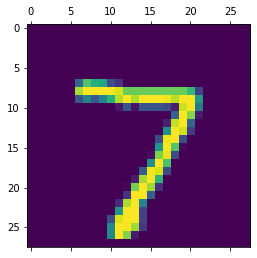

In [66]:
plt.matshow(X_test[0])

In [67]:
y_predicted = model_hm.predict(X_test_normalized)

313/313 [==============================] - 0s 932us/step


In [68]:
y_predicted[0]
# Displays the probability score for each class label. 

array([4.2954531e-02, 8.2770834e-04, 6.9503522e-01, 9.8234707e-01,
       4.8938738e-03, 3.9573580e-02, 2.7186059e-06, 9.9994183e-01,
       3.3725902e-01, 7.8947824e-01], dtype=float32)

In [69]:
np.argmax(y_predicted[0])

7

###### Confusion matrix

Convert the predicted probabilities into actual class labels to contruct confusion matrix

In [70]:
y_predicted[:5]

array([[4.2954531e-02, 8.2770834e-04, 6.9503522e-01, 9.8234707e-01,
        4.8938738e-03, 3.9573580e-02, 2.7186059e-06, 9.9994183e-01,
        3.3725902e-01, 7.8947824e-01],
       [8.5808557e-01, 9.9728149e-01, 9.9999946e-01, 9.9598825e-01,
        1.6102300e-05, 8.7192720e-01, 7.3909664e-01, 1.1774305e-06,
        5.8757854e-01, 3.6862730e-03],
       [9.2378939e-03, 9.9806309e-01, 3.9511243e-01, 2.1187162e-01,
        9.5530085e-02, 2.0873323e-01, 2.4093898e-01, 5.6413293e-01,
        1.6714023e-01, 1.2683582e-01],
       [9.9993736e-01, 1.8610667e-04, 5.8113313e-01, 2.3163339e-02,
        1.2978569e-02, 2.1489689e-01, 2.5663123e-01, 2.9904139e-01,
        3.6464876e-03, 5.7887036e-01],
       [3.7773898e-01, 4.9447186e-02, 2.2640434e-01, 1.1490938e-02,
        9.9973089e-01, 6.6127546e-02, 6.5682375e-01, 1.3030554e-01,
        8.5941069e-02, 9.8442376e-01]], dtype=float32)

In [71]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [72]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    1,    5,    6,    2,    0,    0],
       [   0, 1121,    4,    0,    0,    1,    3,    1,    5,    0],
       [   4,    2,  994,    8,    2,    2,    3,    7,    9,    1],
       [   0,    0,    7,  973,    0,    9,    1,    9,   10,    1],
       [   3,    0,    6,    1,  949,    0,    9,    3,    2,    9],
       [   4,    1,    1,   10,    3,  853,    8,    2,    9,    1],
       [   6,    3,    3,    0,    5,   10,  926,    1,    4,    0],
       [   2,    6,   15,    5,    0,    0,    0,  988,    2,   10],
       [   4,    0,    7,   11,    5,    5,    7,    8,  924,    3],
       [   3,    5,    1,   11,   14,    4,    0,    8,    3,  960]])>

Plot this matrix

Text(69.0, 0.5, 'Truth')

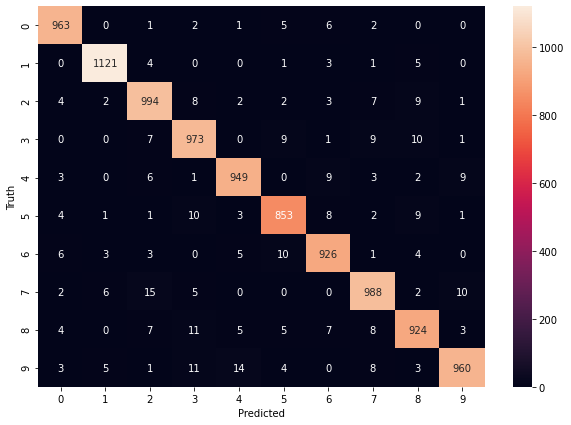

In [73]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style="color:blue" align="center">HM adam vs simple adam for GD (batch size 256)</h3>

In [75]:
model_hm = get_model()
model_hm.fit(X_train_normalized, y_train, epochs = 100, verbose=1, callbacks=[CustomCallback()], batch_size=256) 

Epoch 1/100
235/235 [==============================] - 11s 47ms/step - loss: 0.4462 - accuracy: 0.8765
Epoch 2/100
235/235 [==============================] - 12s 51ms/step - loss: 0.2163 - accuracy: 0.9395
Epoch 3/100
235/235 [==============================] - 14s 58ms/step - loss: 0.1654 - accuracy: 0.9530
Epoch 4/100
235/235 [==============================] - 11s 47ms/step - loss: 0.1342 - accuracy: 0.9616
Epoch 5/100
235/235 [==============================] - 11s 48ms/step - loss: 0.1129 - accuracy: 0.9676
Epoch 6/100
235/235 [==============================] - 12s 52ms/step - loss: 0.0973 - accuracy: 0.9716
Epoch 7/100
235/235 [==============================] - 14s 59ms/step - loss: 0.0851 - accuracy: 0.9757
Epoch 8/100
235/235 [==============================] - 17s 73ms/step - loss: 0.0758 - accuracy: 0.9781
Epoch 9/100
235/235 [==============================] - 12s 51ms/step - loss: 0.0673 - accuracy: 0.9806
Epoch 10/100
235/235 [==============================] - 13s 55ms/step - l

In [76]:
model_wihtout_hm = get_model()
model_wihtout_hm.fit(X_train_normalized, y_train, epochs = 100, verbose=1, batch_size=256) 

Epoch 1/100
235/235 [==============================] - 1s 2ms/step - loss: 0.5470 - accuracy: 0.8514
Epoch 2/100
235/235 [==============================] - 0s 2ms/step - loss: 0.2514 - accuracy: 0.9303
Epoch 3/100
235/235 [==============================] - 0s 2ms/step - loss: 0.1956 - accuracy: 0.9447
Epoch 4/100
235/235 [==============================] - 0s 2ms/step - loss: 0.1634 - accuracy: 0.9535
Epoch 5/100
235/235 [==============================] - 0s 2ms/step - loss: 0.1410 - accuracy: 0.9600
Epoch 6/100
235/235 [==============================] - 0s 2ms/step - loss: 0.1238 - accuracy: 0.9646
Epoch 7/100
235/235 [==============================] - 0s 2ms/step - loss: 0.1105 - accuracy: 0.9677
Epoch 8/100
235/235 [==============================] - 0s 2ms/step - loss: 0.1001 - accuracy: 0.9710
Epoch 9/100
235/235 [==============================] - 0s 2ms/step - loss: 0.0908 - accuracy: 0.9737
Epoch 10/100
235/235 [==============================] - 1s 2ms/step - loss: 0.0827 - accura

Epoch 81/100
235/235 [==============================] - 0s 2ms/step - loss: 5.2375e-04 - accuracy: 1.0000
Epoch 82/100
235/235 [==============================] - 0s 2ms/step - loss: 4.8740e-04 - accuracy: 1.0000
Epoch 83/100
235/235 [==============================] - 0s 2ms/step - loss: 4.5961e-04 - accuracy: 1.0000
Epoch 84/100
235/235 [==============================] - 0s 2ms/step - loss: 4.4380e-04 - accuracy: 1.0000
Epoch 85/100
235/235 [==============================] - 0s 2ms/step - loss: 4.1976e-04 - accuracy: 1.0000
Epoch 86/100
235/235 [==============================] - 0s 2ms/step - loss: 3.9820e-04 - accuracy: 1.0000
Epoch 87/100
235/235 [==============================] - 0s 2ms/step - loss: 3.7885e-04 - accuracy: 1.0000
Epoch 88/100
235/235 [==============================] - 1s 2ms/step - loss: 3.6570e-04 - accuracy: 1.0000
Epoch 89/100
235/235 [==============================] - 0s 2ms/step - loss: 3.5813e-04 - accuracy: 1.0000
Epoch 90/100
235/235 [========================

###### Testing the model

In [77]:
model_wihtout_hm.evaluate(X_test_normalized, y_test)

313/313 [==============================] - 0s 993us/step - loss: 0.1678 - accuracy: 0.9742


[0.16780267655849457, 0.9742000102996826]

In [78]:
model_hm.evaluate(X_test_normalized, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1514 - accuracy: 0.9760


[0.15144461393356323, 0.9760000109672546]

Let us predict for the first image in the testing set

In [79]:
model_hm.predict(X_test_normalized)

313/313 [==============================] - 0s 900us/step


array([[2.4930004e-04, 9.3513704e-12, 1.1082815e-01, ..., 1.0000000e+00,
        4.7443218e-06, 9.1452262e-04],
       [1.7987212e-08, 6.0222429e-01, 1.0000000e+00, ..., 7.4937318e-26,
        3.2737723e-01, 4.9347764e-27],
       [2.4207486e-08, 9.9997646e-01, 1.0503382e-01, ..., 6.2215447e-02,
        1.7531784e-01, 1.7799826e-10],
       ...,
       [6.6569107e-17, 1.0283372e-14, 6.7508108e-18, ..., 3.0124735e-02,
        5.0788847e-05, 9.4887650e-01],
       [2.8009731e-14, 4.9926168e-14, 4.3938506e-14, ..., 1.5756317e-12,
        9.9998736e-01, 8.3369318e-11],
       [3.4948884e-05, 3.6635912e-13, 4.6699080e-01, ..., 2.7204485e-16,
        4.1320111e-11, 9.0322829e-16]], dtype=float32)

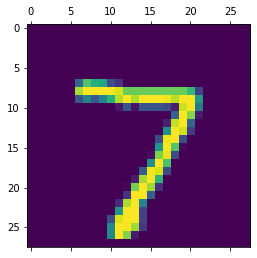

In [80]:
plt.matshow(X_test[0])

In [81]:
y_predicted = model_hm.predict(X_test_normalized)

313/313 [==============================] - 0s 907us/step


In [82]:
y_predicted[0]
# Displays the probability score for each class label. 

array([2.4930004e-04, 9.3513704e-12, 1.1082815e-01, 9.9998593e-01,
       1.9248374e-13, 2.0944119e-08, 3.7476705e-19, 1.0000000e+00,
       4.7443218e-06, 9.1452262e-04], dtype=float32)

In [83]:
np.argmax(y_predicted[0])

7

###### Confusion matrix

Convert the predicted probabilities into actual class labels to contruct confusion matrix

In [84]:
y_predicted[:5]

array([[2.4930004e-04, 9.3513704e-12, 1.1082815e-01, 9.9998593e-01,
        1.9248374e-13, 2.0944119e-08, 3.7476705e-19, 1.0000000e+00,
        4.7443218e-06, 9.1452262e-04],
       [1.7987212e-08, 6.0222429e-01, 1.0000000e+00, 1.1046402e-03,
        2.3324203e-34, 1.1523663e-02, 8.1928640e-08, 7.4937318e-26,
        3.2737723e-01, 4.9347764e-27],
       [2.4207486e-08, 9.9997646e-01, 1.0503382e-01, 2.8146712e-07,
        1.0950106e-04, 1.7233305e-10, 3.8766357e-06, 6.2215447e-02,
        1.7531784e-01, 1.7799826e-10],
       [1.0000000e+00, 8.6735378e-07, 2.0077988e-04, 5.1948096e-10,
        7.6358260e-17, 1.0882227e-06, 2.0105161e-01, 4.3821472e-04,
        1.3796354e-15, 1.1048275e-05],
       [7.5892075e-07, 3.4479591e-13, 7.1133130e-05, 1.9590268e-10,
        1.0000000e+00, 2.8191386e-07, 1.3166823e-07, 5.6593701e-02,
        8.0698440e-03, 9.9998730e-01]], dtype=float32)

In [85]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [86]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    0,    0,    2,    0,    1,    2,    1,    3,    0],
       [   0, 1123,    4,    0,    0,    2,    4,    1,    1,    0],
       [   6,    6,  999,    3,    1,    0,    3,    5,    7,    2],
       [   0,    0,    8,  988,    1,    2,    0,    2,    4,    5],
       [   1,    2,    1,    1,  962,    1,    3,    2,    2,    7],
       [   3,    0,    0,   22,    2,  853,    4,    1,    5,    2],
       [  11,    1,   10,    1,   17,   12,  904,    0,    2,    0],
       [   0,    6,   16,    9,    4,    0,    0,  982,    6,    5],
       [   4,    2,    4,    8,    1,    4,    3,    5,  938,    5],
       [   2,    3,    0,    3,   12,    6,    0,    5,    2,  976]])>

Plot this matrix

Text(69.0, 0.5, 'Truth')

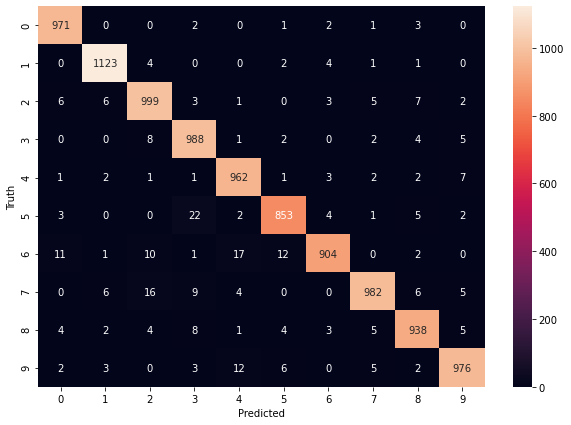

In [87]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')